In [1]:
## imports ##
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
####

## globals ##

nSample=8192
tSample=5e-9
frequency=np.fft.fftshift(np.fft.fftfreq(nSample,tSample))
samples=np.arange(0,nSample,1)
time=samples*tSample
noiseVar=700
fLO=25e9
doPlots=True

##


# Omniscient Filter

[1.51864312]


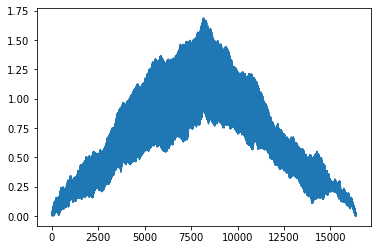

In [2]:
## define signal ##

signalFreqs=np.array([10e6,30e6,50e6])
signalPhases=np.array([.1,4.,7.])
signalAmps=[.5,1,.5]
signalTime=np.zeros(time.size,dtype=np.complex128)
for i in range(signalFreqs.size):
    signalTime+=signalAmps[i]*np.exp(-1j*2*np.pi*(signalFreqs[i]*time-signalPhases[i]))

####

## define template and noisy signal calculate convolution ##

noise=np.random.multivariate_normal(mean=[0,0],cov=np.eye(2)*noiseVar/2,size=nSample)
noise=noise[:,0]+1j*noise[:,1]

signal=signalTime+noise
#signal=noise

template=signalTime

convolution=np.convolve(template,signal)/nSample

print(abs(np.convolve(template,signal,mode='valid')/nSample))


plt.figure()
plt.plot(abs(convolution))


#plt.plot(frequency,abs(np.fft.fftshift(np.fft.fft(signal)))/(3*nSample))
#plt.xlim(4064,4128)
####

#print(np.max(abs(convolution)),np.argmax(abs(convolution)))



# Amplitude Filter

[1.27851065]


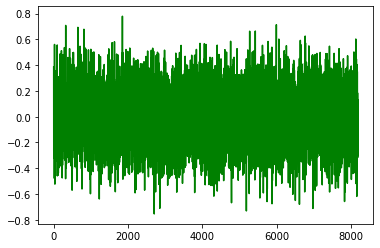

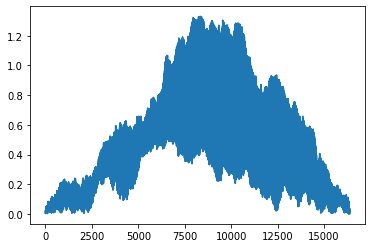

In [3]:
## define signal ##

signalFreqs=np.array([10e6,30e6,50e6])
signalPhases=np.array([.1,4.,7.])
signalAmps=[.5,1,.5]
signalTime=np.zeros(time.size,dtype=np.complex128)
for i in range(signalFreqs.size):
    signalTime+=signalAmps[i]*np.exp(-1j*2*np.pi*(signalFreqs[i]*time-signalPhases[i]))

####

## define template and noisy signal calculatet convolution ##

noise=np.random.multivariate_normal(mean=[0,0],cov=np.eye(2)*noiseVar/2,size=nSample)
noise=noise[:,0]+1j*noise[:,1]

signal=signalTime+noise

templateFreqs=np.array([10e6,30e6,50e6])
templatePhases=np.array([0.,0.,0.])
templateAmps=[1,1,1]
template=np.zeros(time.size,dtype=np.complex128)
for i in range(signalFreqs.size):
    template+=templateAmps[i]*np.exp(-1j*2*np.pi*(templateFreqs[i]*time-templatePhases[i]))
    
#template=template


print(abs(np.convolve(template,signal,mode='valid')/nSample))
plt.figure()
#plt.plot(np.fft.fftshift(template)/nSample,'b')
#plt.plot(np.fft.fftshift(np.fft.fft(signalTime)).real/nSample,'r')
plt.plot(np.fft.fftshift(np.fft.fft(signal)).real/nSample,'g')

convolution=np.convolve(template,signal,mode='full')/nSample
#convolution=np.fft.ifft(template*np.fft.fft(signal)/nSample**2)
plt.figure()
plt.plot((abs(convolution)))
#plt.xlim(2000,6000)
#plt.plot(convolution)




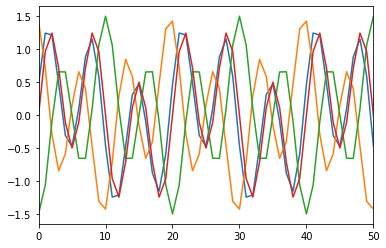

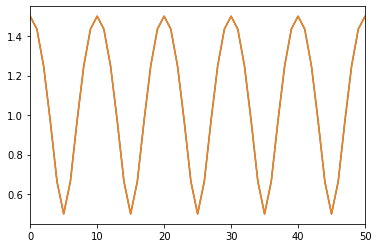

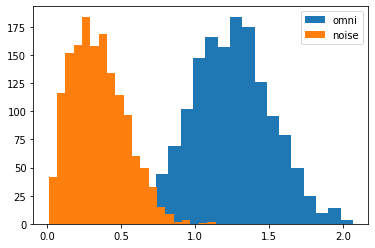

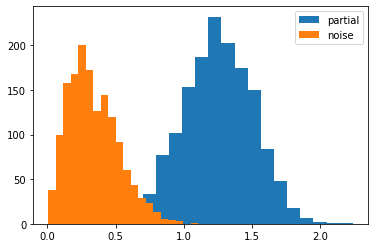

In [15]:
# Generate Histograms #

noiseVar=1000

## define signal ##

signalFreqs=np.array([10e6,30e6])
signalPhases=np.array([0.2,0.2])
signalAmps=[.5,1,.5]
signalTime=np.zeros(time.size,dtype=np.complex128)
for i in range(signalFreqs.size):
    signalTime+=signalAmps[i]*np.exp(-1j*2*np.pi*(signalFreqs[i]*time-signalPhases[i]))
    
partialFreqs=np.array([10e6,30e6])
partialPhases=np.array([0.5,0.5])
partialAmps=[.5,1,.5]
partialTemplate=np.zeros(time.size,dtype=np.complex128)
for i in range(signalFreqs.size):
    partialTemplate+=partialAmps[i]*np.exp(-1j*2*np.pi*(partialFreqs[i]*time-partialPhases[i]))
        

plt.figure()
#plt.plot(abs(signalTime))
plt.plot(signalTime.real)
plt.plot(signalTime.imag)
#plt.plot(abs(partialTemplate))
plt.plot(partialTemplate.real)
plt.plot(partialTemplate.imag)
plt.xlim(0,50)


plt.figure()
plt.plot(abs(signalTime))
plt.plot(abs(partialTemplate))
plt.xlim(0,50)
####


trueTemplate=signalTime

nTest=1500
trueConvolution=np.zeros(nTest)
for n in range(nTest):
    
    
    noise=np.random.multivariate_normal(mean=[0,0],cov=np.eye(2)*noiseVar/2,size=nSample)
    noise=noise[:,0]+1j*noise[:,1]

    signal=trueTemplate+noise
    
    trueConvolution[n]=abs(np.convolve(trueTemplate,signal,mode='valid')/nSample)
    
noiseTrueConvolution=np.zeros(nTest)
for n in range(nTest):
    
    
    noise=np.random.multivariate_normal(mean=[0,0],cov=np.eye(2)*noiseVar/2,size=nSample)
    noise=noise[:,0]+1j*noise[:,1]

    signal=noise
    
    noiseTrueConvolution[n]=abs(np.convolve(trueTemplate,signal,mode='valid')/nSample)
    
partialConvolution=np.zeros(nTest)
for n in range(nTest):
    
    
    noise=np.random.multivariate_normal(mean=[0,0],cov=np.eye(2)*noiseVar/2,size=nSample)
    noise=noise[:,0]+1j*noise[:,1]

    signal=trueTemplate+noise
    
    partialConvolution[n]=abs(np.convolve(partialTemplate,signal,mode='valid')/nSample)

noisePartialConvolution=np.zeros(nTest)
for n in range(nTest):
    
    
    noise=np.random.multivariate_normal(mean=[0,0],cov=np.eye(2)*noiseVar/2,size=nSample)
    noise=noise[:,0]+1j*noise[:,1]

    signal=noise
    
    noisePartialConvolution[n]=abs(np.convolve(partialTemplate,signal,mode='valid')/nSample)
    
#amplitudeConvolution=np.zeros(nTest)
#for n in range(nTest):
    
    
#    noise=np.random.multivariate_normal(mean=[0,0],cov=np.eye(2)*noiseVar/2,size=nSample)
#    noise=noise[:,0]+1j*noise[:,1]

#    signal=trueTemplate+noise
    
#    amplitudeConvolution[n]=abs(np.convolve(abs(partialTemplate),signal,mode='valid')/nSample)

#noiseAmplitudeConvolution=np.zeros(nTest)
#for n in range(nTest):
    
    
#    noise=np.random.multivariate_normal(mean=[0,0],cov=np.eye(2)*noiseVar/2,size=nSample)
#    noise=noise[:,0]+1j*noise[:,1]

#    signal=noise
    
#    noiseAmplitudeConvolution[n]=abs(np.convolve(abs(partialTemplate),signal,mode='valid')/nSample)

plt.figure()
plt.hist(trueConvolution,20,label='omni')
plt.hist(noiseTrueConvolution,20,label='noise')
#plt.hist(partialConvolution,20,label='partial')
plt.legend(loc=0)

plt.figure()
plt.hist(partialConvolution,20,label='partial')
plt.hist(noisePartialConvolution,20,label='noise')
#plt.hist(partialConvolution,20,label='partial')
plt.legend(loc=0)

#plt.figure()
#plt.hist(amplitudeConvolution,20,label='partial')
#plt.hist(noiseAmplitudeConvolution,20,label='noise')
#plt.hist(partialConvolution,20,label='partial')
#plt.legend(loc=0)